# A magical day in Disney with Machine Learning - Part 4 Feature Selecting Techniques

In this notebook I will be performing several Feature filtering techniques and also training a Logistic Regression model with the data from the last post.

### Testing how the correlation will work

In these few lines, I will be testing the correlation code in order to create a function later on

In [15]:
import pandas as pd
df = pd.read_csv('harryPotterClean.csv')

<AxesSubplot:>

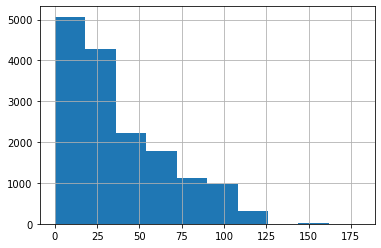

In [2]:
df['Harry_Potter_and_the_Forbidden'].hist()

In [3]:
df.drop(df.tail(17).index,inplace=True) 

In [4]:
#pd.set_option('display.max_rows',None)
df.tail(10)

,Unnamed: 0,month,day,year,hour,minute,holiday,day.1,Pandemic,temperature,humidity,pressure,report,Harry_Potter_and_the_Forbidden
15758,18692,0.454545,0.8,1.0,0.782609,0.6,0.0,0.833333,0.0,0.640896,0.728395,0.4,0.0625,35.0
15759,18693,0.454545,0.8,1.0,0.782609,0.8,0.0,0.833333,0.0,0.638209,0.728395,0.4,0.0625,35.0
15760,18694,0.454545,0.8,1.0,0.782609,1.0,0.0,0.833333,0.0,0.637015,0.703704,0.4,0.3125,35.0
15761,18695,0.454545,0.8,1.0,0.826087,0.0,0.0,0.833333,0.0,0.636418,0.728395,0.4,0.0000,45.0
15762,18696,0.454545,0.8,1.0,0.826087,0.2,0.0,0.833333,0.0,0.636418,0.728395,0.4,0.0000,45.0
15763,18697,0.454545,0.8,1.0,0.826087,0.4,0.0,0.833333,0.0,0.634627,0.728395,0.4,0.0000,45.0
15764,18698,0.454545,0.8,1.0,0.826087,0.6,0.0,0.833333,0.0,0.634030,0.716049,0.4,0.0000,45.0
15765,18699,0.454545,0.8,1.0,0.826087,0.8,0.0,0.833333,0.0,0.631940,0.716049,0.4,0.1250,25.0
15766,18700,0.454545,0.8,1.0,0.826087,1.0,0.0,0.833333,0.0,0.628657,0.716049,0.4,0.1250,10.0
15767,18701,0.454545,0.8,1.0,0.869565,0.0,0.0,0.833333,0.0,0.628955,0.716049,0.4,0.1250,10.0


In [5]:
df = df.drop(['Unnamed: 0'],axis=1)

In [6]:
df.corr(method ='pearson')

,month,day,year,hour,minute,holiday,day.1,Pandemic,temperature,humidity,pressure,report,Harry_Potter_and_the_Forbidden
month,1.000000,0.075410,-0.926673,0.048757,0.000326,0.088694,-0.032821,NaN,0.193516,0.179337,-0.063946,0.088637,0.097152
day,0.075410,1.000000,-0.052101,-0.001277,0.000478,0.059598,0.013350,NaN,0.151633,0.031590,0.086984,-0.007523,0.105527
year,-0.926673,-0.052101,1.000000,-0.048387,0.001450,-0.118866,0.028239,NaN,-0.121841,-0.237229,0.091120,-0.108476,-0.028160
hour,0.048757,-0.001277,-0.048387,1.000000,-0.053725,0.010705,0.028274,NaN,0.013456,-0.128082,-0.127452,0.035753,-0.196399
minute,0.000326,0.000478,0.001450,-0.053725,1.000000,0.002728,0.000785,NaN,0.000545,-0.005877,0.000461,-0.019496,0.007772
holiday,0.088694,0.059598,-0.118866,0.010705,0.002728,1.000000,-0.119266,NaN,-0.076671,0.037616,0.063759,0.014289,0.159011
day.1,-0.032821,0.013350,0.028239,0.028274,0.000785,-0.119266,1.000000,NaN,0.004340,-0.075350,0.024801,-0.094702,0.089410
Pandemic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temperature,0.193516,0.151633,-0.121841,0.013456,0.000545,-0.076671,0.004340,NaN,1.000000,-0.122337,-0.337702,0.139401,0.178418
humidity,0.179337,0.031590,-0.237229,-0.128082,-0.005877,0.037616,-0.075350,NaN,-0.122337,1.000000,-0.222178,0.302415,-0.128659


In [7]:
df.corr(method ='kendall')

,month,day,year,hour,minute,holiday,day.1,Pandemic,temperature,humidity,pressure,report,Harry_Potter_and_the_Forbidden
month,1.000000,0.055026,-0.739135,0.020206,0.000944,0.066744,-0.026394,NaN,0.120458,0.109556,-0.023625,0.070173,0.092505
day,0.055026,1.000000,-0.043079,-0.004933,0.000341,0.048305,0.014652,NaN,0.088577,0.014779,0.076465,0.007011,0.089228
year,-0.739135,-0.043079,1.000000,-0.028542,0.001290,-0.118866,0.025375,NaN,-0.094242,-0.200297,0.074529,-0.100113,0.012482
hour,0.020206,-0.004933,-0.028542,1.000000,-0.042335,0.017481,0.019546,NaN,-0.020139,-0.101093,-0.104420,0.024463,-0.168177
minute,0.000944,0.000341,0.001290,-0.042335,1.000000,0.002395,0.000621,NaN,0.000328,-0.003857,-0.000048,-0.013166,0.006215
holiday,0.066744,0.048305,-0.118866,0.017481,0.002395,1.000000,-0.103608,NaN,-0.064052,0.035654,0.062331,0.005122,0.102868
day.1,-0.026394,0.014652,0.025375,0.019546,0.000621,-0.103608,1.000000,NaN,0.003202,-0.050438,0.023258,-0.072879,0.071534
Pandemic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
temperature,0.120458,0.088577,-0.094242,-0.020139,0.000328,-0.064052,0.003202,NaN,1.000000,-0.109347,-0.238154,0.136554,0.139885
humidity,0.109556,0.014779,-0.200297,-0.101093,-0.003857,0.035654,-0.050438,NaN,-0.109347,1.000000,-0.151364,0.206206,-0.122661


In [8]:
pearson_corr = df.corr(method='pearson')
kendall_corr =  df.corr(method = 'kendall')

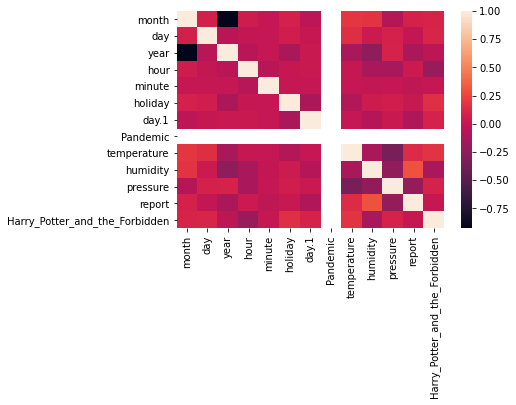

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(pearson_corr)
plt.show()

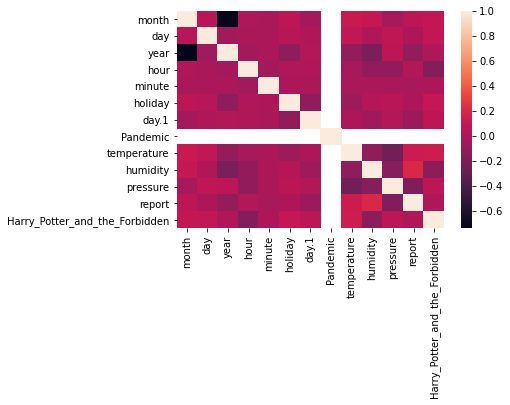

In [10]:
sns.heatmap(kendall_corr)
plt.show()

In [11]:
hpPear = pearson_corr['Harry_Potter_and_the_Forbidden']
hpPear.sort_values(ascending=False)

Harry_Potter_and_the_Forbidden    1.000000
temperature                       0.178418
holiday                           0.159011
day                               0.105527
month                             0.097152
pressure                          0.090793
day.1                             0.089410
report                            0.012176
minute                            0.007772
year                             -0.028160
humidity                         -0.128659
hour                             -0.196399
Pandemic                               NaN
Name: Harry_Potter_and_the_Forbidden, dtype: float64

In [12]:
hpKen = kendall_corr['Harry_Potter_and_the_Forbidden']
hpKen.sort_values(ascending=False)

Harry_Potter_and_the_Forbidden    1.000000
temperature                       0.139885
holiday                           0.102868
month                             0.092505
day                               0.089228
day.1                             0.071534
pressure                          0.070398
report                            0.021043
year                              0.012482
minute                            0.006215
humidity                         -0.122661
hour                             -0.168177
Pandemic                               NaN
Name: Harry_Potter_and_the_Forbidden, dtype: float64

### Correlation function

In [27]:
def correlation(df,title):
    df.drop(df.tail(17).index,inplace=True) 
    df = df.drop(['Unnamed: 0'],axis=1)
    df.corr(method ='pearson')
    df.corr(method ='kendall')
    pearson_corr = df.corr(method='pearson')
    kendall_corr =  df.corr(method = 'kendall')
    sns.heatmap(pearson_corr)
    print(title)
    plt.title("Pearson Correlation")
    plt.show()
    sns.heatmap(kendall_corr)
    plt.title("Kendall Correlation")
    plt.show()
    hpPear = pearson_corr['Harry_Potter_and_the_Forbidden']
    print('Correlation with Pearson method')
    print(hpPear.sort_values(ascending=False))
    hpKen = kendall_corr['Harry_Potter_and_the_Forbidden']
    print ("")
    print('Correlation with Kendall method')
    print(hpKen.sort_values(ascending=False))

#### Manual Correlation

As seen in part3, I did 3 different types of encoding, OneHotEncoding, Ordinal Encoding and Manual Encoding, I will be testing all of them separatelly, starting with the Manual Encoding because I think it will have the best results

Manual Encoding correlation


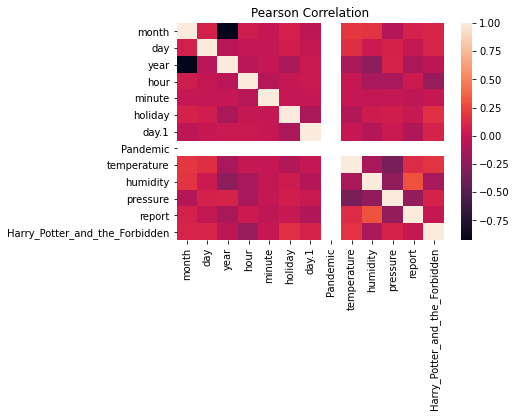

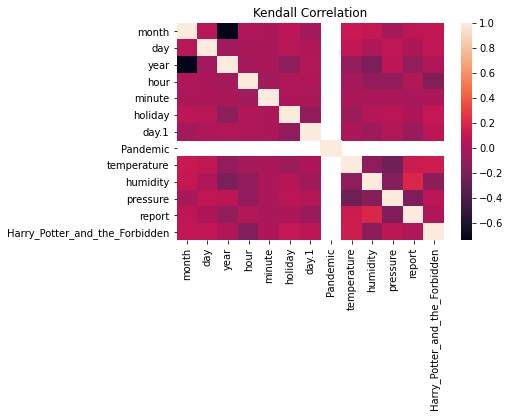

Correlation with Pearson method
Harry_Potter_and_the_Forbidden    1.000000
temperature                       0.178418
holiday                           0.159011
day                               0.105527
month                             0.097152
pressure                          0.090793
day.1                             0.089410
report                            0.012176
minute                            0.007772
year                             -0.028160
humidity                         -0.128659
hour                             -0.196399
Pandemic                               NaN
Name: Harry_Potter_and_the_Forbidden, dtype: float64

Correlation with Kendall method
Harry_Potter_and_the_Forbidden    1.000000
temperature                       0.139885
holiday                           0.102868
month                             0.092505
day                               0.089228
day.1                             0.071534
pressure                          0.070398
report                

In [97]:
df_manCorr = pd.read_csv('harryPotterClean.csv')
title="Manual Encoding correlation"
correlation(df_manCorr,title)

#### One hot encoding correlation

One Hot Encoding correlation


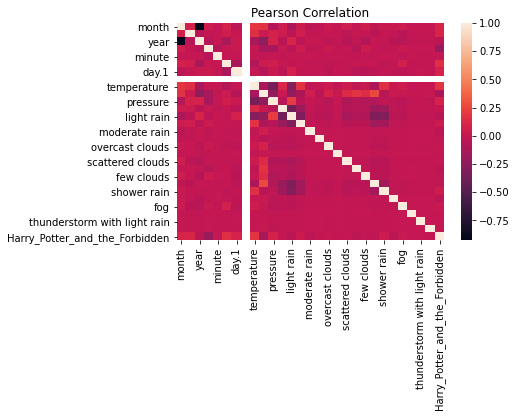

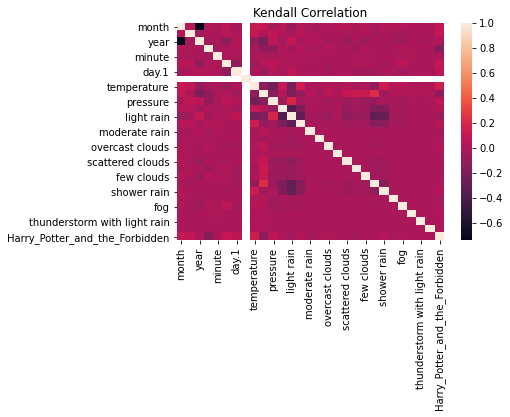

Correlation with Pearson method
Harry_Potter_and_the_Forbidden    1.000000
temperature                       0.178418
holiday                           0.159011
day                               0.105527
month                             0.097152
pressure                          0.090793
day.1                             0.089410
shower rain                       0.039700
broken clouds                     0.034910
fog                               0.026678
overcast clouds                   0.012569
heavy intensity rain              0.012420
minute                            0.007772
haze                              0.004893
thunderstorm with light rain      0.002667
scattered clouds                  0.002074
clear sky                        -0.006603
mist                             -0.006660
light intensity drizzle          -0.007290
few clouds                       -0.009121
thunderstorm                     -0.016848
very heavy rain                  -0.024642
moderate rain         

In [100]:
df_OHE = pd.read_csv('harryPotterCleanOHE.csv')
title="One Hot Encoding correlation"
correlation(df_OHE,title)

#### Ordinal Encoding correlation

Ordinal Encoding correlation


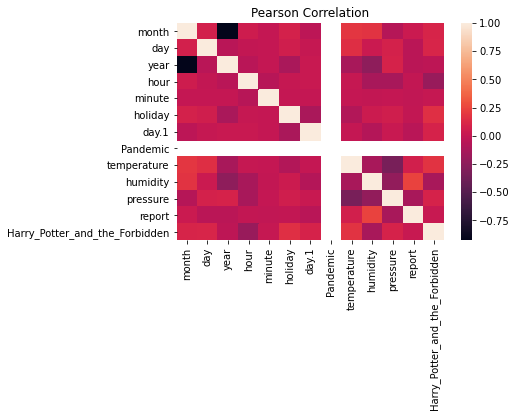

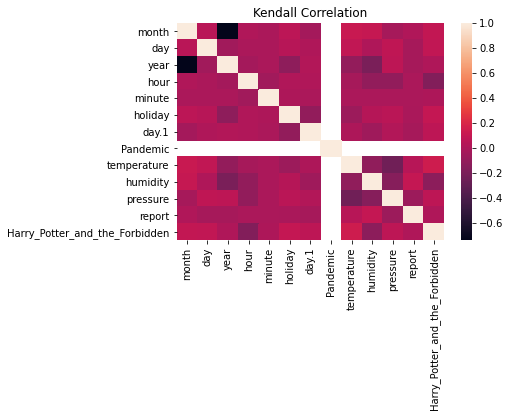

Correlation with Pearson method
Harry_Potter_and_the_Forbidden    1.000000
temperature                       0.178418
holiday                           0.159011
day                               0.105527
month                             0.097152
pressure                          0.090793
day.1                             0.089410
report                            0.014895
minute                            0.007772
year                             -0.028160
humidity                         -0.128659
hour                             -0.196399
Pandemic                               NaN
Name: Harry_Potter_and_the_Forbidden, dtype: float64

Correlation with Kendall method
Harry_Potter_and_the_Forbidden    1.000000
temperature                       0.139885
holiday                           0.102868
month                             0.092505
day                               0.089228
day.1                             0.071534
pressure                          0.070398
year                  

In [101]:
df_OE = pd.read_csv('harryPotterCleanOE.csv')
title="Ordinal Encoding correlation"
correlation(df_OE,title)

### Mutual Information

Mutual information from Ordinal Encoding

code obtained from: https://www.rasgoml.com/feature-engineering-tutorials/feature-selection-using-mutual-information-in-scikit-learn

In [52]:
x = df.drop(['Harry_Potter_and_the_Forbidden','Unnamed: 0'],axis=1)
x.head()

,month,day,year,hour,minute,holiday,day.1,Pandemic,temperature,humidity,pressure,report
0,0.636364,0.966667,0.0,0.608696,0.4,0.0,0.0,0.0,0.721791,0.740741,0.2,0.3125
1,0.636364,0.966667,0.0,0.608696,0.6,0.0,0.0,0.0,0.721791,0.740741,0.2,0.3125
2,0.636364,0.966667,0.0,0.608696,0.8,0.0,0.0,0.0,0.711940,0.679012,0.2,0.4375
3,0.636364,0.966667,0.0,0.608696,1.0,0.0,0.0,0.0,0.723881,0.679012,0.2,0.0000
4,0.636364,0.966667,0.0,0.652174,0.0,0.0,0.0,0.0,0.724179,0.679012,0.2,0.0000


In [53]:
y=df['Harry_Potter_and_the_Forbidden']
y

0        40.0
1        40.0
2        40.0
3        40.0
4        20.0
         ... 
15763    45.0
15764    45.0
15765    25.0
15766    10.0
15767    10.0
Name: Harry_Potter_and_the_Forbidden, Length: 15768, dtype: float64

In [66]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif, mutual_info_regression

selector = SelectKBest(mutual_info_classif, k=12)
X_reduced = selector.fit_transform(x, y)
X_reduced.shape

(15768, 12)

In [63]:
cols = selector.get_support(indices=True)
selected_columns = x.iloc[:,cols].columns.tolist()
selected_columns

['month',
 'day',
 'year',
 'hour',
 'minute',
 'holiday',
 'day.1',
 'Pandemic',
 'temperature',
 'humidity',
 'pressure',
 'report']

Select top 50%

In [64]:
selector = SelectPercentile(mutual_info_classif, percentile=25)
X_reduced = selector.fit_transform(x, y)
X_reduced.shape

(15768, 3)

In [65]:
cols = selector.get_support(indices=True)
selected_columns = x.iloc[:,cols].columns.tolist()
selected_columns

['month', 'day', 'temperature']

In [67]:
selector = SelectKBest(mutual_info_regression, k=12)
X_reduced = selector.fit_transform(x, y)
cols = selector.get_support(indices=True)
selected_columns = x.iloc[:,cols].columns.tolist()
selected_columns

['month',
 'day',
 'year',
 'hour',
 'minute',
 'holiday',
 'day.1',
 'Pandemic',
 'temperature',
 'humidity',
 'pressure',
 'report']

Code obtained from: https://medium.com/@hertan06/which-features-to-use-in-your-model-350630a1e31c

In [69]:
from sklearn.feature_selection import mutual_info_classif
threshold = 12  # the number of most relevant features
high_score_features = []
feature_scores = mutual_info_classif(x, y, random_state=0)
for score, f_name in sorted(zip(feature_scores, x.columns), reverse=True)[:threshold]:
        print(f_name, score)
        high_score_features.append(f_name)
HP_MI = x[high_score_features]
print(HP_MI.columns)

day 0.18505177339453693
temperature 0.18286209470519177
month 0.16763763819857047
humidity 0.15686370343028244
hour 0.14927911917134562
day.1 0.08994784889804786
pressure 0.08935906217799872
year 0.018678915010097885
holiday 0.01862455001523733
report 0.0099473042549576
minute 0.004944395663643242
Pandemic 0.000942327907519136
Index(['day', 'temperature', 'month', 'humidity', 'hour', 'day.1', 'pressure',
       'year', 'holiday', 'report', 'minute', 'Pandemic'],
      dtype='object')


Mutual information function

In [116]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif, mutual_info_regression

def mutualInfo(df,k):
    x = df.drop(['Harry_Potter_and_the_Forbidden','Unnamed: 0'],axis=1)
    y=df['Harry_Potter_and_the_Forbidden']
    
    #classification
    selector = SelectKBest(mutual_info_classif, k)
    X_reduced = selector.fit_transform(x, y)
    cols = selector.get_support(indices=True)
    selected_columns = x.iloc[:,cols].columns.tolist()
    print('Mutual information for classification--------------')
    print(selected_columns)
    
    #regression
    selector = SelectKBest(mutual_info_regression, k)
    X_reduced = selector.fit_transform(x, y)
    cols = selector.get_support(indices=True)
    selected_columns = x.iloc[:,cols].columns.tolist()
    print('Mutual information for regression------------------')
    print(selected_columns)
    
    #second code with classification
    threshold = k  # the number of most relevant features
    high_score_features = []
    feature_scores = mutual_info_classif(x, y, random_state=0)
    print('Second code for mutual information for classification------------------')
    for score, f_name in sorted(zip(feature_scores, x.columns), reverse=True)[:threshold]:
            print(f_name, score)
            high_score_features.append(f_name)
    HP_MI = x[high_score_features]

In [86]:
mutualInfo(df)

Mutual information for classification--------------
['month', 'day', 'year', 'hour', 'minute', 'holiday', 'day.1', 'Pandemic', 'temperature', 'humidity', 'pressure', 'report']
Mutual information for regression------------------
['month', 'day', 'year', 'hour', 'minute', 'holiday', 'day.1', 'Pandemic', 'temperature', 'humidity', 'pressure', 'report']
Second code for mutual information for classification------------------
day 0.18505177339453693
temperature 0.18286209470519177
month 0.16763763819857047
humidity 0.15686370343028244
hour 0.14927911917134562
day.1 0.08994784889804786
pressure 0.08935906217799872
year 0.018678915010097885
holiday 0.01862455001523733
report 0.0099473042549576
minute 0.004944395663643242
Pandemic 0.000942327907519136


### Variance threshold

In [87]:
from sklearn.feature_selection import VarianceThreshold

def varianceTh(df):
    x = df.drop(['Harry_Potter_and_the_Forbidden','Unnamed: 0'],axis=1)
    y=df['Harry_Potter_and_the_Forbidden']
    selector = VarianceThreshold(threshold=0.01) # Variance threshold 
    sel = selector.fit(x)
    sel_index = sel.get_support()
    HP_VT = x.iloc[:, sel_index]
    print(HP_VT.columns)

In [89]:
varianceTh(df)

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'day.1',
       'temperature', 'humidity', 'pressure', 'report'],
      dtype='object')


### MRMR

Code obtained from : https://towardsdatascience.com/mrmr-explained-exactly-how-you-wished-someone-explained-to-you-9cf4ed27458b

In [72]:
pip install mrmr_selection

  Using cached sklearn-0.0-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [112]:
from mrmr import mrmr_classif
from sklearn.datasets import make_classification

def mrmr(df,k): 
    x = df.drop(['Harry_Potter_and_the_Forbidden','Unnamed: 0'],axis=1)
    y=df['Harry_Potter_and_the_Forbidden']
    Y = pd.Series(y)
    # use mrmr classification
    selected_features = mrmr_classif(x, Y, K = k)
    print(selected_features)

In [113]:
mrmr(df,12)

100%|██████████| 11/11 [00:01<00:00,  8.71it/s]

['temperature', 'hour', 'holiday', 'humidity', 'day', 'year', 'day.1', 'month', 'pressure', 'minute', 'report']


So far we have created a function to obtain the evaluation of every variable with different methods, but we need to repeat this process several times and it will not be efficient to run the processes with every dataFrame independently so, lets create a function that will make all evaluations at once. 

In [117]:
def featureSelection (df, title,k):
    print('\n----------------Correlation---------------')
    correlation(df,title)
    print('\n----------------Mutual Information---------------')
    mutualInfo(df,k)
    print('\n----------------Variance Threshold---------------')
    varianceTh(df)
    print('\n----------------MRMR---------------')
    mrmr(df,k)




----------------Correlation---------------
Manual Correlation


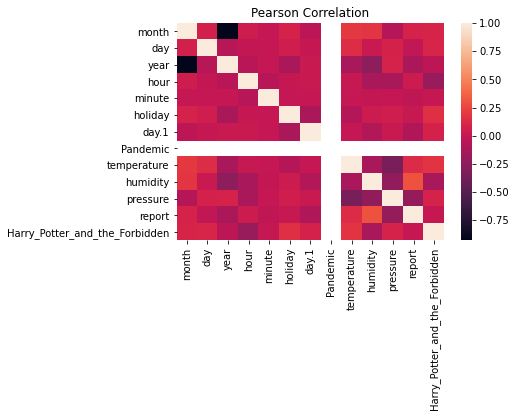

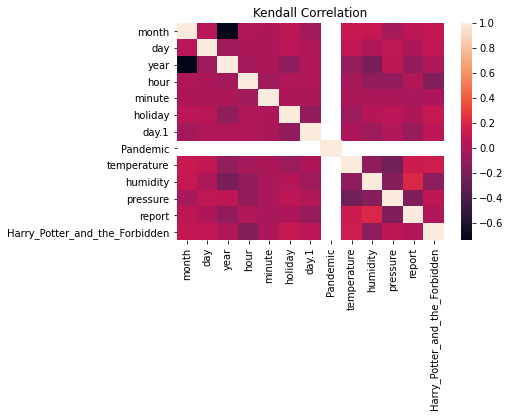

Correlation with Pearson method
Harry_Potter_and_the_Forbidden    1.000000
temperature                       0.177324
holiday                           0.159949
day                               0.103937
month                             0.097461
pressure                          0.090818
day.1                             0.088261
report                            0.011031
minute                            0.008280
year                             -0.030112
humidity                         -0.129962
hour                             -0.197418
Pandemic                               NaN
Name: Harry_Potter_and_the_Forbidden, dtype: float64

Correlation with Kendall method
Harry_Potter_and_the_Forbidden    1.000000
temperature                       0.138891
holiday                           0.103939
month                             0.093327
day                               0.087349
pressure                          0.070126
day.1                             0.068378
report                

100%|██████████| 11/11 [00:01<00:00,  8.63it/s]


['temperature', 'day.1', 'hour', 'holiday', 'humidity', 'day', 'year', 'month', 'pressure', 'minute', 'report']



----------------Correlation---------------
OneHotEncoding


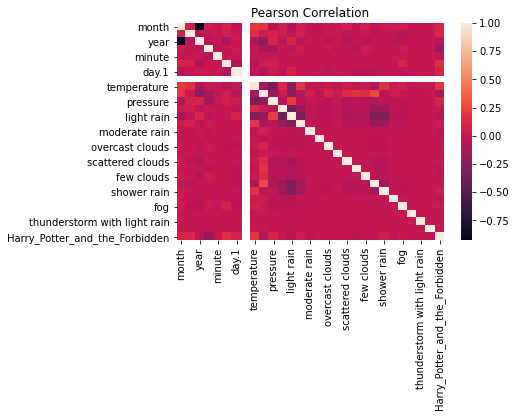

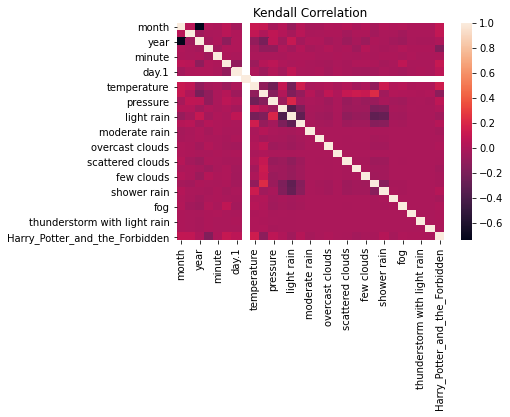

Correlation with Pearson method
Harry_Potter_and_the_Forbidden    1.000000
temperature                       0.177845
holiday                           0.159730
day                               0.104445
month                             0.097397
pressure                          0.090879
day.1                             0.088517
shower rain                       0.039862
broken clouds                     0.034744
fog                               0.026788
overcast clouds                   0.012696
heavy intensity rain              0.012523
minute                            0.008225
haze                              0.004912
thunderstorm with light rain      0.002692
scattered clouds                 -0.000780
mist                             -0.006590
clear sky                        -0.006600
light intensity drizzle          -0.007278
few clouds                       -0.008967
thunderstorm                     -0.016976
very heavy rain                  -0.024623
moderate rain         

100%|██████████| 27/27 [00:01<00:00, 18.08it/s]


['temperature', 'day.1', 'hour', 'holiday', 'humidity', 'day', 'haze', 'year', 'shower rain', 'very heavy rain', 'month', 'pressure', 'thunderstorm with light rain', 'broken clouds', 'fog', 'overcast clouds', 'thunderstorm', 'minute', 'mist', 'moderate rain', 'thunderstorm with rain', 'heavy intensity rain', 'few clouds', 'clear sky', 'scattered clouds', 'light intensity drizzle', 'light rain']



----------------Correlation---------------
Ordinal Encoding


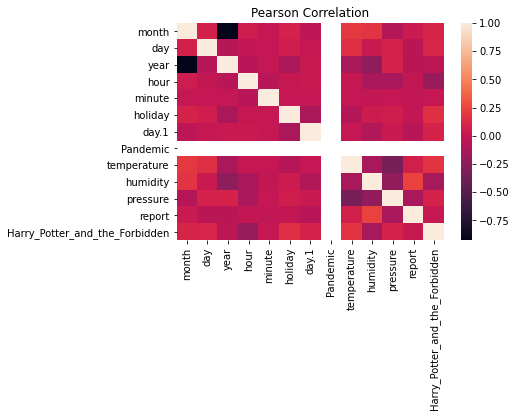

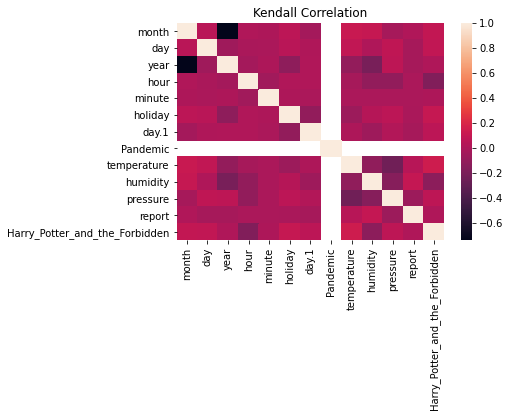

Correlation with Pearson method
Harry_Potter_and_the_Forbidden    1.000000
temperature                       0.177845
holiday                           0.159730
day                               0.104445
month                             0.097397
pressure                          0.090879
day.1                             0.088517
report                            0.014370
minute                            0.008225
year                             -0.029582
humidity                         -0.130002
hour                             -0.197499
Pandemic                               NaN
Name: Harry_Potter_and_the_Forbidden, dtype: float64

Correlation with Kendall method
Harry_Potter_and_the_Forbidden    1.000000
temperature                       0.139380
holiday                           0.103737
month                             0.093241
day                               0.087815
pressure                          0.070284
day.1                             0.068749
report                

100%|██████████| 11/11 [00:01<00:00,  8.81it/s]

['temperature', 'day.1', 'hour', 'holiday', 'humidity', 'day', 'year', 'month', 'pressure', 'minute', 'report']


In [118]:
print('\n')
featureSelection (df_manCorr, 'Manual Correlation',12)
print('\n')
featureSelection (df_OHE, 'OneHotEncoding',28)
print('\n')
featureSelection (df_OE, 'Ordinal Encoding',12)